<a href="https://colab.research.google.com/github/parthcode22/Credit-Card-deliquency-risk-data-analysis/blob/master/Tata_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/new Delinquency_prediction_dataset (1).csv')



In [ ]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [ ]:
df.head(10)

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
5,CUST0006,25,84042.0,700.0,0.650540,6,0,48361.0,0.260688,Unemployed,7,Gold,New York,On-time,Late,Missed,Missed,Missed,Late
6,CUST0007,38,35056.0,354.0,0.390581,3,0,4638.0,0.484265,employed,17,Platinum,New York,On-time,Missed,Missed,Late,Missed,Late
7,CUST0008,56,123215.0,415.0,0.532715,5,0,55776.0,0.358695,EMP,1,Student,New York,On-time,On-time,On-time,Late,Missed,Late
8,CUST0009,36,66991.0,405.0,0.413035,5,1,NaN,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
9,CUST0010,40,34870.0,679.0,0.361824,4,0,93922.0,0.333081,EMP,5,Business,Los Angeles,On-time,Missed,Missed,On-time,Missed,Missed


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


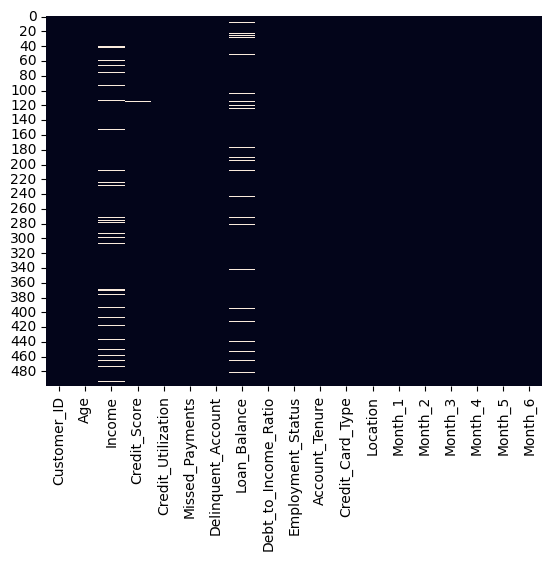

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [ ]:
df['Income_missing'] = df['Income'].isnull().astype(int)
#Create a missingness indicator:

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df['Income_missing'] = df['Income'].isnull().astype(int)


In [ ]:
df.groupby('Income_missing')['Loan_Balance'].mean()


,Loan_Balance
Income_missing,
0,48671.516055
1,48441.571429


In [ ]:
df.groupby('Income_missing')['Credit_Card_Type'].value_counts(normalize=True)


Income_missing  Credit_Card_Type
0               Gold                0.242950
                Student             0.223427
                Business            0.216920
                Standard            0.169197
                Platinum            0.147505
1               Student             0.230769
                Business            0.205128
                Platinum            0.205128
                Standard            0.205128
                Gold                0.153846
Name: proportion, dtype: float64

<Axes: >

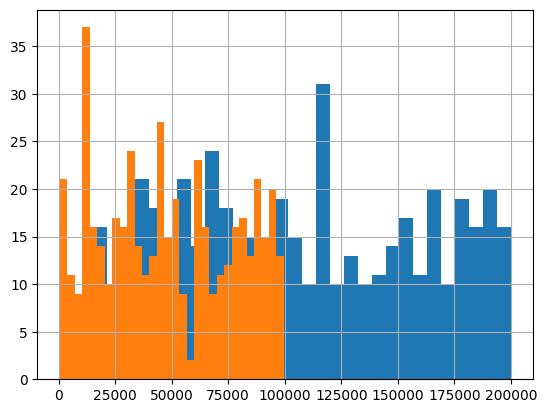

In [ ]:
df['Income'].hist(bins=30)
df['Loan_Balance'].hist(bins=30)


In [ ]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Loan_Balance'].fillna(df['Loan_Balance'].median(), inplace=True)


In [ ]:
#stage 1 cleared

In [ ]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Income_missing
count,500.000000,500.000000,498.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48487.480000,0.298862,9.740000,0.07800
std,16.187629,51523.389667,168.881211,0.197103,1.946935,0.366973,28536.522206,0.094521,5.923054,0.26844
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000,0.00000
25%,33.000000,67610.500000,418.250000,0.356486,1.000000,0.000000,24847.000000,0.233639,5.000000,0.00000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000,0.00000
75%,59.250000,152572.250000,727.250000,0.634440,5.000000,0.000000,73809.500000,0.362737,15.000000,0.00000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000,1.00000


In [ ]:
df['Income'].skew()


np.float64(0.05127463225656534)

In [ ]:
#iqr based detection outliers

In [ ]:
Q1_Income = df['Income'].quantile(0.25)
Q3_Income = df['Income'].quantile(0.75)
IQR = Q3_Income - Q1_Income


In [ ]:
print(f"Q1 (25%): {Q1_Income}")
print(f"Q3 (75%): {Q3_Income}")
print(f"IQR: {IQR}")


Q1 (25%): 67610.5
Q3 (75%): 152572.25
IQR: 84961.75


In [ ]:
lower_income = Q1_Income - 1.5 * IQR
upper_income = Q3_Income + 1.5 * IQR
print(f"Lower Bound: {lower_income}")
print(f"Upper Bound: {upper_income}")


Lower Bound: -59832.125
Upper Bound: 280014.875


In [ ]:
outliers_income = df[(df['Income'] < lower_income) | (df['Income'] > upper_income)]
print("Income Outliers:", len(outliers_income))

Income Outliers: 0


In [ ]:
Q1_Loan = df['Loan_Balance'].quantile(0.25)
Q3_Loan = df['Loan_Balance'].quantile(0.75)
IQR = Q3_Loan - Q1_Loan


In [ ]:
print(f"Q1 (25%): {Q1_Loan}")
print(f"Q3 (75%): {Q3_Loan}")
print(f"IQR: {IQR}")


Q1 (25%): 24847.0
Q3 (75%): 73809.5
IQR: 48962.5


In [ ]:
lower_loan = Q1_Loan - 1.5 * IQR
upper_loan = Q3_Loan + 1.5 * IQR
print(f"Lower Bound: {lower_loan}")
print(f"Upper Bound: {upper_loan}")


Lower Bound: -48596.75
Upper Bound: 147253.25


In [ ]:
outliers_loan = df[(df['Loan_Balance'] < lower_loan) | (df['Loan_Balance'] > upper_loan)]
print("Loan Balance Outliers:", len(outliers_loan))

Loan Balance Outliers: 0


In [ ]:
Q1_Miss = df['Missed_Payments'].quantile(0.25)
Q3_Miss = df['Missed_Payments'].quantile(0.75)
IQR = Q3_Miss - Q1_Miss


In [ ]:
print(f"Q1 (25%): {Q1_Miss}")
print(f"Q3 (75%): {Q3_Miss}")
print(f"IQR: {IQR}")


Q1 (25%): 1.0
Q3 (75%): 5.0
IQR: 4.0


In [ ]:
lower_miss = Q1_Miss - 1.5 * IQR
upper_miss = Q3_Miss + 1.5 * IQR
print(f"Lower Bound: {lower_miss}")
print(f"Upper Bound: {upper_miss}")


Lower Bound: -5.0
Upper Bound: 11.0


In [ ]:
outliers_miss = df[(df['Missed_Payments'] < lower_miss) | (df['Missed_Payments'] > upper_miss)]
print("Late Payments Outliers:", len(outliers_miss))

Late Payments Outliers: 0


In [ ]:
Q1_Uti = df['Credit_Utilization'].quantile(0.25)
Q3_Uti = df['Credit_Utilization'].quantile(0.75)
IQR = Q3_Uti - Q1_Uti


In [ ]:
print(f"Q1 (25%): {Q1_Uti}")
print(f"Q3 (75%): {Q3_Uti}")
print(f"IQR: {IQR}")


Q1 (25%): 0.356486053
Q3 (75%): 0.63444035075
IQR: 0.27795429775


In [ ]:
lower_uti = Q1_Uti - 1.5 * IQR
upper_uti = Q3_Uti + 1.5 * IQR
print(f"Lower Bound: {lower_uti}")
print(f"Upper Bound: {upper_uti}")


Lower Bound: -0.06044539362500001
Upper Bound: 1.051371797375


In [ ]:
outliers_uti = df[(df['Credit_Utilization'] < lower_uti) | (df['Credit_Utilization'] > upper_uti)]
print("Credit Utilization  Outliers:", len(outliers_uti))

Credit Utilization  Outliers: 0


In [ ]:
Q1_Credit = df['Credit_Score'].quantile(0.25)
Q3_Credit = df['Credit_Score'].quantile(0.75)
IQR = Q3_Credit - Q1_Credit


In [ ]:
print(f"Q1 (25%): {Q1_Credit}")
print(f"Q3 (75%): {Q3_Credit}")
print(f"IQR: {IQR}")


Q1 (25%): 418.25
Q3 (75%): 727.25
IQR: 309.0


In [ ]:
lower_credit = Q1_Credit - 1.5 * IQR
upper_credit = Q3_Credit + 1.5 * IQR
print(f"Lower Bound: {lower_credit}")
print(f"Upper Bound: {upper_credit}")


Lower Bound: -45.25
Upper Bound: 1190.75


In [ ]:
outliers_credit = df[(df['Credit_Score'] < lower_credit) | (df['Credit_Score'] > upper_credit)]
print("Credit_Score Outliers:", len(outliers_credit))

Credit_Score Outliers: 0


In [ ]:
outliers_income = df[(df['Income'] < lower_income) | (df['Income'] > upper_income)]
outliers_income


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Income_missing


In [ ]:
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR = Q3_Age - Q1_Age


In [ ]:
print(f"Q1 (25%): {Q1_Age}")
print(f"Q3 (75%): {Q3_Age}")
print(f"IQR: {IQR}")


Q1 (25%): 33.0
Q3 (75%): 59.25
IQR: 26.25


In [ ]:
lower_age = Q1_Age - 1.5 * IQR
upper_age = Q3_Age + 1.5 * IQR
print(f"Lower Bound: {lower_age}")
print(f"Upper Bound: {upper_age}")


Lower Bound: -6.375
Upper Bound: 98.625


In [ ]:
outliers_age = df[(df['Age'] < lower_age) | (df['Age'] > upper_age)]
print("Age Outliers:", len(outliers_age))

Age Outliers: 0


In [ ]:
#relation between variables

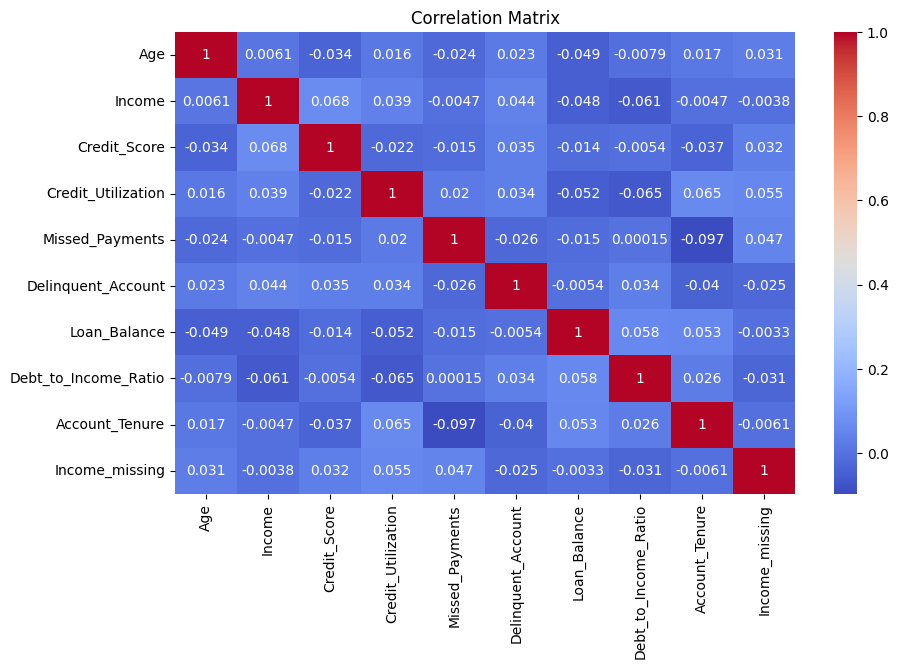

In [ ]:
numeric_df = df.select_dtypes(include='number')  # select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


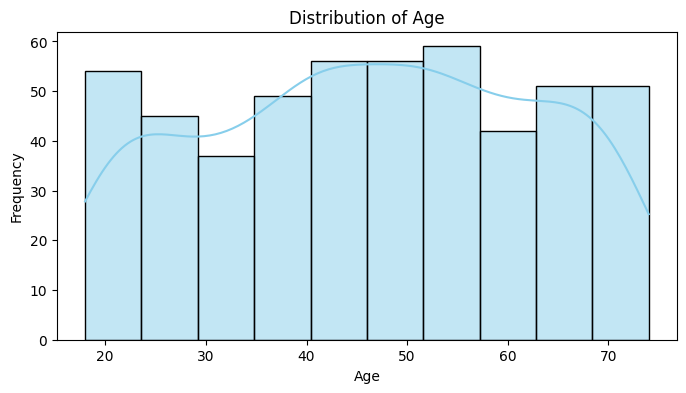

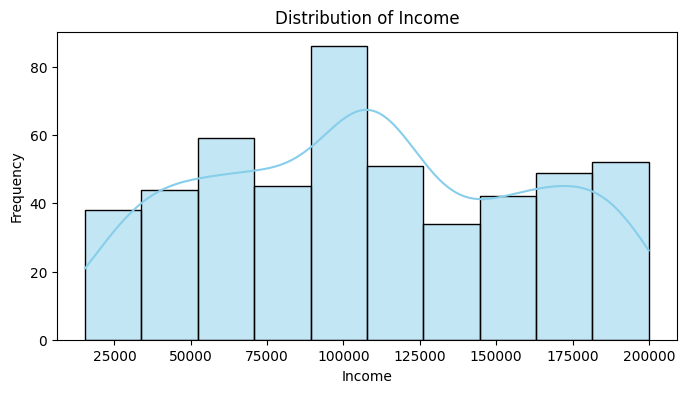

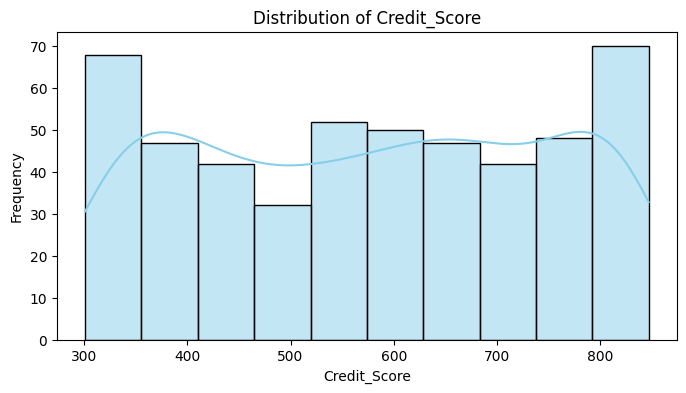

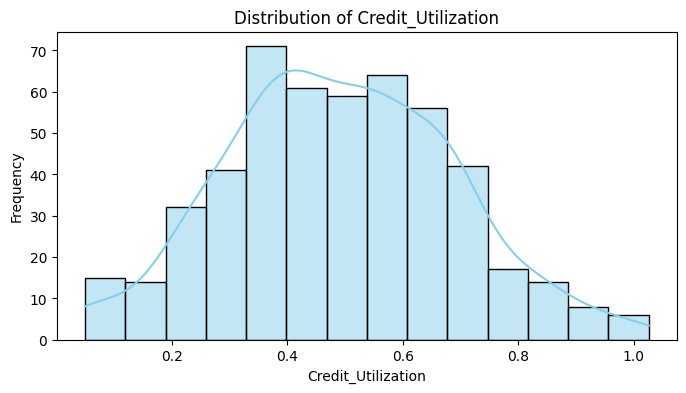

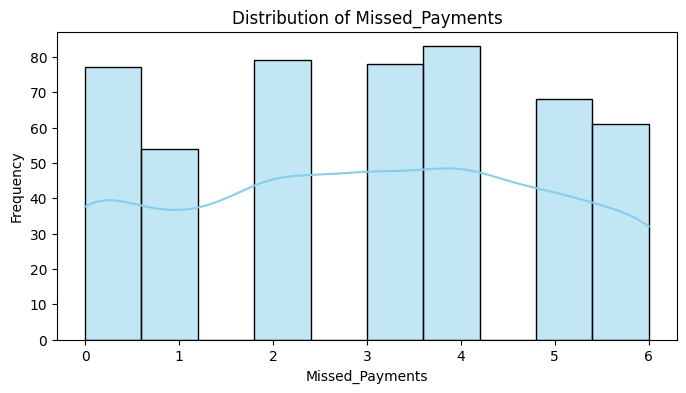

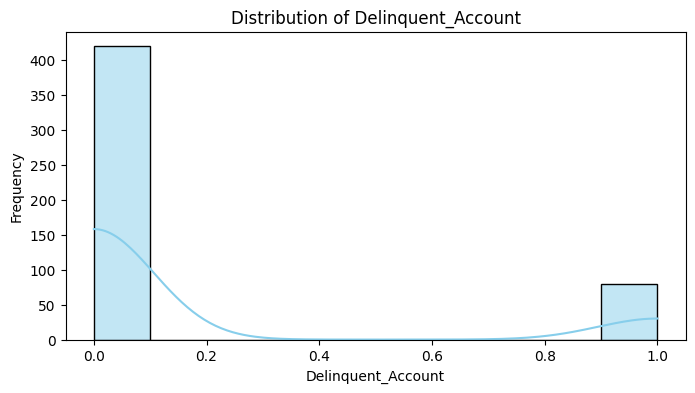

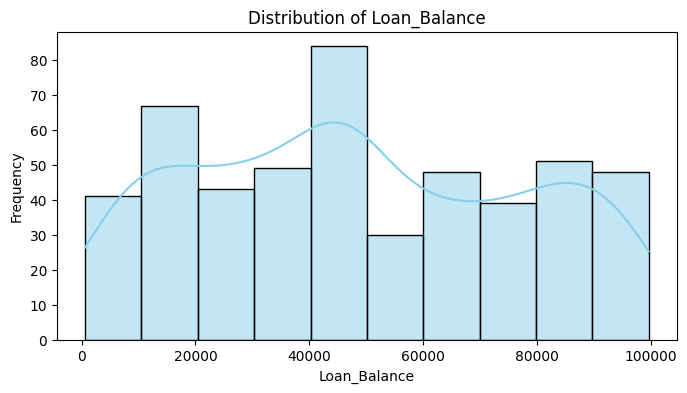

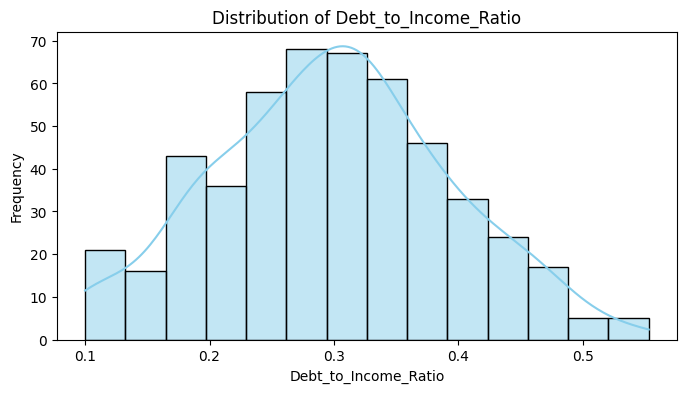

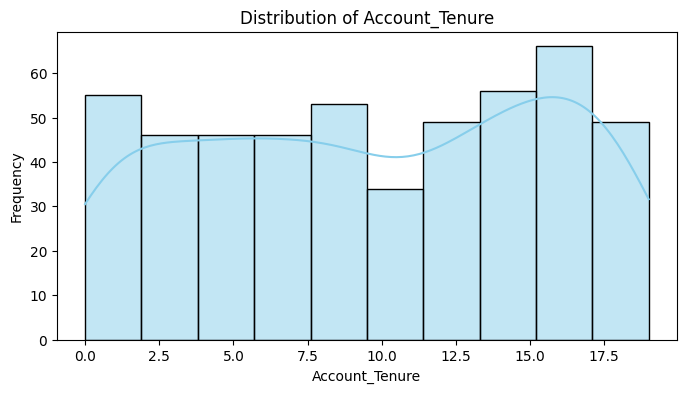

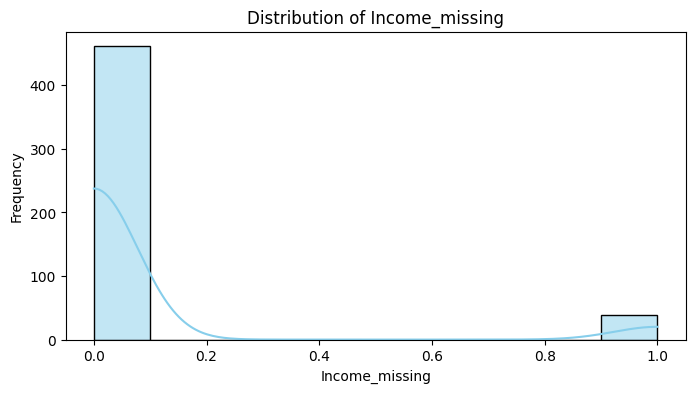

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
#step 3 prediction

In [ ]:
#identify 3 top feature for prediction

In [ ]:
df.corr(numeric_only=True)['Delinquent_Account'].sort_values()


,Delinquent_Account
Account_Tenure,-0.039829
Missed_Payments,-0.026478
Income_missing,-0.025225
Loan_Balance,-0.005438
Age,0.022508
Credit_Utilization,0.034224
Debt_to_Income_Ratio,0.034386
Credit_Score,0.034833
Income,0.043991
Delinquent_Account,1.000000


In [ ]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
top_features = ['Income', 'Credit_Score', 'Debt_to_Income_Ratio']
X = df[top_features]
y = df['Delinquent_Account']


In [ ]:
#create x and y features

In [ ]:
# Separate target and features
X = df.drop('Delinquent_Account', axis=1)  # All columns except target
y = df['Delinquent_Account']              # Target column


In [ ]:
#encode categorial value that is convrt it into numeirc values

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [ ]:
#split train and test 80% train 20% test

In [ ]:
# Assuming your scaled features are stored in X_scaled and target is y
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#start training the model logistic regression

In [ ]:
# Check for any NaNs remaining
import numpy as np
print(np.isnan(X_train).sum())  # Should be 0
print(np.isnan(X_test).sum())   # Should be 0


2
0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Check for any NaNs remaining
print(np.isnan(X_train).sum())  # Should be 0
print(np.isnan(X_test).sum())   # Should be 0


0
0


In [ ]:
#train the data 80%

In [ ]:
# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)#.fit(): Trains the model using training data.




LogisticRegression()

In [ ]:
#predict the data for y target variable 20%

In [ ]:
# Predict on test data
y_pred_logreg = logreg.predict(X_test)

In [ ]:
#model evaluation accuracy check of model confusion matrix and f1 score

In [ ]:
print("Logistic Regression Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Results:

Accuracy: 0.84

Confusion Matrix:
 [[84  0]
 [16  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



In [ ]:
#there is am imbalance

In [ ]:
#check the imbalance data

Class Distribution:
{np.int64(0): np.int64(420), np.int64(1): np.int64(80)}


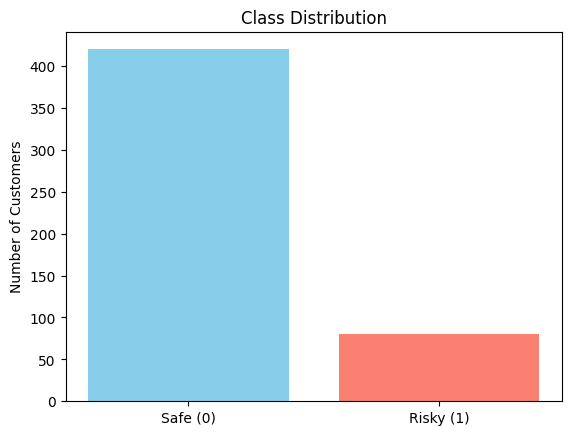

In [ ]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution:")
print(class_distribution)

# Visualize it
plt.bar(class_distribution.keys(), class_distribution.values(), color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Safe (0)', 'Risky (1)'])
plt.title("Class Distribution")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
#data is imbalance and fix the imbalance the data set beocz 400 custom are safe and 80-90 customers are risky

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original class distribution
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 336, 1: 64})
After SMOTE: Counter({0: 336, 1: 336})


In [ ]:
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = logreg.predict(X_test)


In [ ]:
#reevaluation after balancing the class

In [ ]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Confusion Matrix:
 [[84  0]
 [16  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



In [ ]:
logreg_bal = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_bal.fit(X_train, y_train)

# Predict
y_pred_bal = logreg_bal.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("Classification Report:\n", classification_report(y_test, y_pred_bal))


Accuracy: 0.84
Confusion Matrix:
 [[84  0]
 [16  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



In [ ]:
#random forst classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.83
Confusion Matrix:
 [[83  1]
 [16  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.83       100
   macro avg       0.42      0.49      0.45       100
weighted avg       0.70      0.83      0.76       100



In [ ]:
y.value_counts()


,count
Delinquent_Account,
0,420
1,80


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[83  1]
 [16  0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.83       100
   macro avg       0.42      0.49      0.45       100
weighted avg       0.70      0.83      0.76       100

